In [10]:
#%%
"""
Normal density recovery using the COS method
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [28]:
def COSDensity(cf,x,N,a,b):
    i = complex(0.0,1.0) #assigning i=sqrt(-1)
    k = np.linspace(0,N-1,N)
    u = np.zeros([1,N])
    u = k * np.pi / (b-a)

    #F_k coefficients
    F_k    = 2.0 / (b - a) * np.real(cf(u) * np.exp(-i * u * a));
    F_k[0] = F_k[0] * 0.5; # adjustment for the first term

    #Final calculation
    f_X = np.matmul(F_k , np.cos(np.outer(u, x - a )))

    # we output only the first row
    return f_X

def mainCalculation():
    i = complex(0.0, 1.0) #assigning i=sqrt(-1)

    # setting for the COS method
    a = -10
    b = 10

    #define the range for the expansion points
    N = [2**x for x in range(2,7,1)]

    # setting for normal distribution
    mu = 0.0
    sigma = 1.0

    # Define characteristic function for the normal distribution
    cF = lambda u : np.exp(i * mu * u - 0.5 * np.power(sigma,2.0) * np.power(u,2.0));

    # define domain for density
    x = np.linspace(-10,10,1000)
    f_XExact = st.norm.pdf(x,mu,sigma)

    plt.figure(1)
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("$f_X(x)$")
    for n in N:
        f_X = COSDensity(cF,x,n,a,b)
        error = np.max(np.abs(f_X-f_XExact))
        print("For {0} expanansion terms the error is {1}".format(n,error))

        plt.plot(x,f_X, label = n)
    plt.legend()

For 4 expanansion terms the error is 0.2537377837565189
For 8 expanansion terms the error is 0.10751732725194052
For 16 expanansion terms the error is 0.007172377614980574
For 32 expanansion terms the error is 4.0323407890507923e-07
For 64 expanansion terms the error is 2.5376549196350734e-16


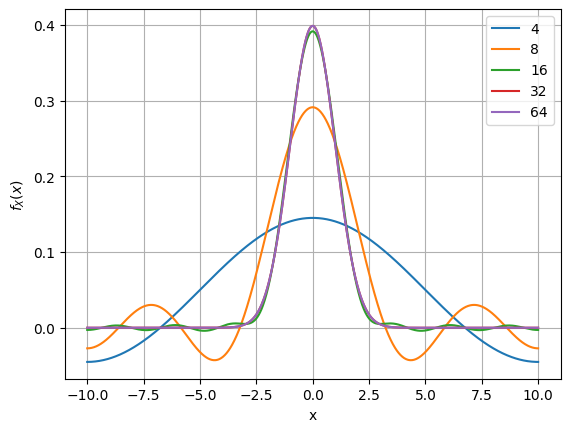

In [29]:
mainCalculation()

# Significance of a,b

For interval a = -1, b = 1, the max error is: 5.072e-01
For interval a = -2, b = 2, the max error is: 3.992e-01
For interval a = -5, b = 5, the max error is: 3.989e-01
For interval a = -10, b = 10, the max error is: 2.538e-16


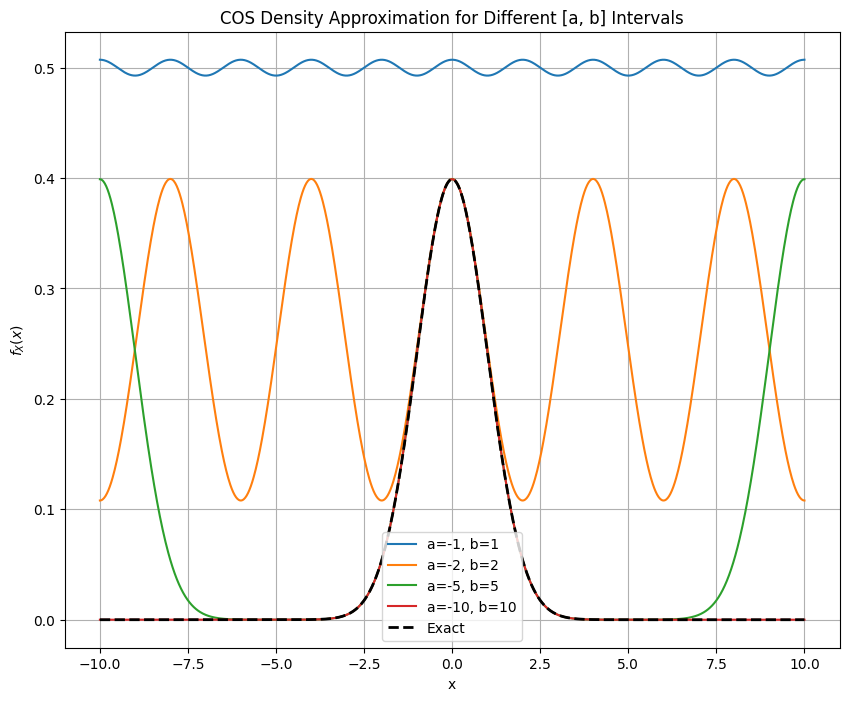

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

def COSDensity(cf, x, N, a, b):
    i = complex(0.0, 1.0)  # i = sqrt(-1)
    k = np.linspace(0, N-1, N)
    u = k * np.pi / (b - a)

    # Compute the Fourier cosine coefficients F_k.
    F_k = 2.0 / (b - a) * np.real(cf(u) * np.exp(-i * u * a))
    F_k[0] = F_k[0] * 0.5  # Adjust the first term

    # Reconstruct the density using the cosine series.
    # Outer product: each cosine evaluated at (x-a) for each frequency u.
    f_X = np.matmul(F_k, np.cos(np.outer(u, x - a)))
    return f_X

def mainCalculation():
    i = complex(0.0, 1.0)  # i = sqrt(-1)

    # Different selections for [a, b] to show the impact on the COS method.
    intervals = [(-1, 1), (-2, 2), (-5, 5), (-10, 10)]
    
    # Settings for normal distribution.
    mu = 0.0
    sigma = 1.0

    # Define the characteristic function for the normal distribution.
    cF = lambda u: np.exp(i * mu * u - 0.5 * sigma**2 * u**2)
    
    # Domain for density evaluation.
    x = np.linspace(-10, 10, 1000)
    
    # Exact density for comparison.
    f_XExact = st.norm.pdf(x, mu, sigma)
    
    # Fix the number of expansion terms.
    N = 64

    plt.figure(figsize=(10, 8))
    plt.grid(True)
    plt.xlabel("x")
    plt.ylabel("$f_X(x)$")
    
    # Loop over different intervals.
    for (a, b) in intervals:
        f_X = COSDensity(cF, x, N, a, b)
        error = np.max(np.abs(f_X - f_XExact))
        print("For interval a = {0}, b = {1}, the max error is: {2:.3e}".format(a, b, error))
        plt.plot(x, f_X, label="a={0}, b={1}".format(a, b))
    
    # Plot the exact density for reference.
    plt.plot(x, f_XExact, 'k--', lw=2, label="Exact")
    plt.title("COS Density Approximation for Different [a, b] Intervals")
    plt.legend()
    plt.show()

# Run the calculation.
mainCalculation()
